<a href="https://colab.research.google.com/github/venugopals002/Venus/blob/main/BOPP_tape_analysis_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries (if not pre-installed)
!pip install pandas openpyxl matplotlib seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load data
df = pd.read_excel("/content/BOPP tape data _ Clened.xlsx", sheet_name="Cleaned file")

In [5]:
# Data Cleaning
df['Units Sold in 2024 (No of tapes)'] = df['Units Sold in 2024 (No of tapes)'].clip(lower=0)  # Fix negative values
df = df.drop_duplicates(subset=['Item Code'])

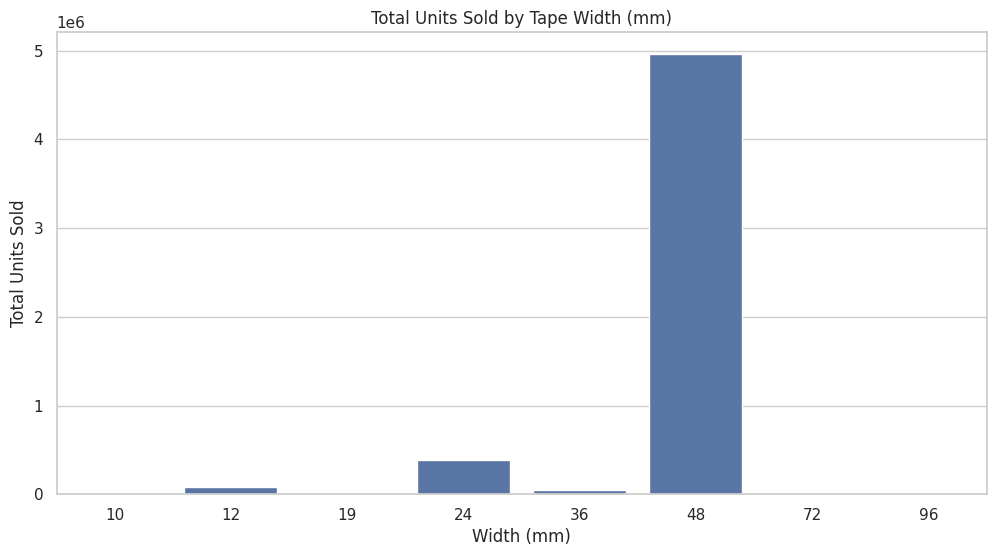

In [6]:
# Set Seaborn style correctly
sns.set_theme(style="whitegrid")  # <-- Fixes the style error

# ------------------------------------------
# Plot 1: Sales by Width (Corrected)
# ------------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Width in MM',
    y='Units Sold in 2024 (No of tapes)',
    data=df,
    estimator=sum,
    errorbar=None
)
plt.title("Total Units Sold by Tape Width (mm)")
plt.xlabel("Width (mm)")
plt.ylabel("Total Units Sold")
plt.show()

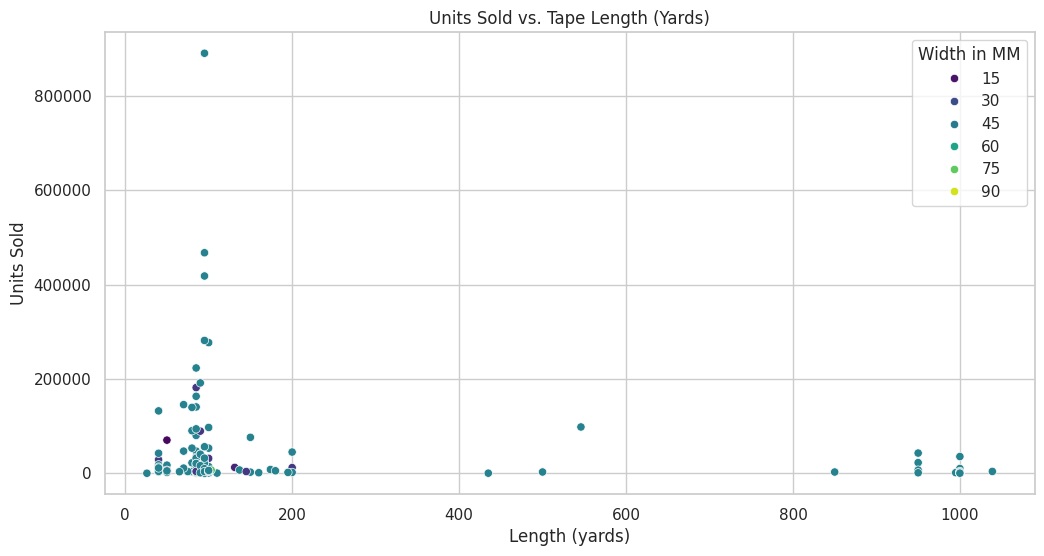

In [7]:
# ------------------------------------------
# Plot 2: Sales vs. Length (Corrected)
# ------------------------------------------
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Length (yard)',
    y='Units Sold in 2024 (No of tapes)',
    hue='Width in MM',
    data=df,
    palette='viridis'
)
plt.title("Units Sold vs. Tape Length (Yards)")
plt.xlabel("Length (yards)")
plt.ylabel("Units Sold")
plt.show()

<ipython-input-8-29db5128794f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


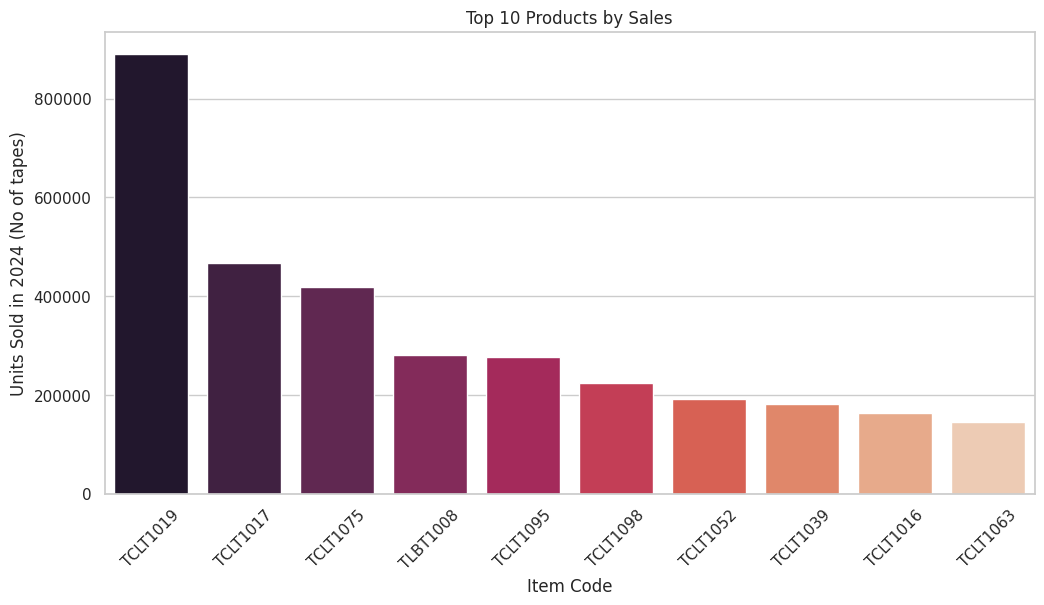

In [8]:
# ------------------------------------------
# Plot 3: Top 10 Products (Corrected)
# ------------------------------------------
top_10 = df.sort_values('Units Sold in 2024 (No of tapes)', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Item Code',
    y='Units Sold in 2024 (No of tapes)',
    data=top_10,
    palette='rocket'
)
plt.xticks(rotation=45)
plt.title("Top 10 Products by Sales")
plt.show()

In [14]:
# Identify underperforming tapes (bottom 5%)
threshold = df['Units Sold in 2024 (No of tapes)'].quantile(0.1)
underperforming = df[df['Units Sold in 2024 (No of tapes)'] < threshold]
print("Tapes to Eliminate:")
print(underperforming[['Item Code', 'Units Sold in 2024 (No of tapes)']])

Tapes to Eliminate:
    Item Code  Units Sold in 2024 (No of tapes)
12   TCLT1032                              30.0
15   TCLT1043                             180.0
25   TCLT1185                             456.0
28   TCLT1203                             360.0
40   TPRT1072                             348.0
50   TCLT1042                             168.0
69   TCLT1107                               0.0
70   TCLT1116                             315.0
79   TCLT1182                             372.0
104  TPRT1048                               0.0
106  TPRT1057                             636.0
112  TPRT1069                             204.0


In [15]:
# Identify best sizes
best_sizes = df.groupby(['Width in MM', 'Tape Thickness (microns)']).agg(
    total_sales=('Units Sold in 2024 (No of tapes)', 'sum')
).sort_values('total_sales', ascending=False).head(3)
print("\nTop 3 Sizes to Continue:")
print(best_sizes)


Top 3 Sizes to Continue:
                                       total_sales
Width in MM Tape Thickness (microns)              
48          50                        2.440487e+06
            40                        1.292335e+06
            45                        1.066243e+06
